<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/coba_1_CIFAR_10_dan_CIFAR_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Setting random seed for reproducibility
tf.random.set_seed(42)

In [4]:
# Loading the CIFAR-10 dataset
(x_train_10, y_train_10), (x_test_10, y_test_10) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Loading the CIFAR-100 dataset
(x_train_100, y_train_100), (x_test_100, y_test_100) = tf.keras.datasets.cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
# Normalizing the data
x_train_10 = x_train_10.astype('float32') / 255.0
x_test_10 = x_test_10.astype('float32') / 255.0
x_train_100 = x_train_100.astype('float32') / 255.0
x_test_100 = x_test_100.astype('float32') / 255.0

In [7]:
# One-hot encoding the labels
y_train_10 = tf.keras.utils.to_categorical(y_train_10, 10)
y_test_10 = tf.keras.utils.to_categorical(y_test_10, 10)
y_train_100 = tf.keras.utils.to_categorical(y_train_100, 100)
y_test_100 = tf.keras.utils.to_categorical(y_test_100, 100)

In [8]:
# Function to plot training history
def plot_history(history, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{title} Accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()

# Model 1: Simple CNN on CIFAR-10

In [9]:
# Building a simple CNN model
model_cifar10_simple = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compiling the model
model_cifar10_simple.compile(optimizer='adam',
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

In [11]:
# Training the model
history_cifar10_simple = model_cifar10_simple.fit(
    x_train_10, y_train_10,
    epochs=10,
    batch_size=64,
    validation_data=(x_test_10, y_test_10)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.3633 - loss: 1.7514 - val_accuracy: 0.5479 - val_loss: 1.2736
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.5612 - loss: 1.2507 - val_accuracy: 0.5895 - val_loss: 1.1698
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.6043 - loss: 1.1308 - val_accuracy: 0.6060 - val_loss: 1.1195
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.6316 - loss: 1.0550 - val_accuracy: 0.6162 - val_loss: 1.0981
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.6528 - loss: 0.9975 - val_accuracy: 0.6232 - val_loss: 1.0807
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.6693 - loss: 0.9499 - val_accuracy: 0.6284 - val_loss: 1.0761
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.6838 - loss: 0.9100 - val_accuracy: 0.6321 - val_loss: 1.0667
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.6977 - loss: 0.8733 - 

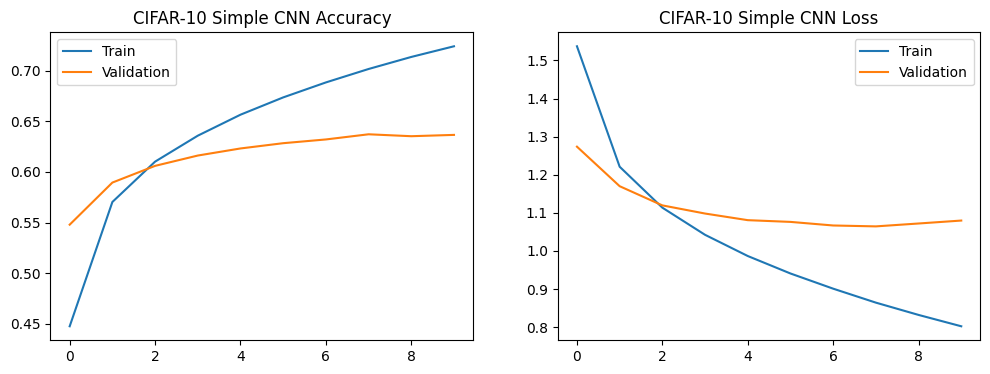

In [12]:
# Plotting training history
plot_history(history_cifar10_simple, 'CIFAR-10 Simple CNN')

In [13]:
# Evaluating the model
test_loss, test_acc = model_cifar10_simple.evaluate(x_test_10, y_test_10, verbose=2)
print(f'CIFAR-10 Simple CNN Test Accuracy: {test_acc:.4f}')

313/313 - 4s - 12ms/step - accuracy: 0.6366 - loss: 1.0796
CIFAR-10 Simple CNN Test Accuracy: 0.6366


# Model 2: Data Augmentation on CIFAR-10

In [14]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [15]:
# Building a more complex CNN model
model_cifar10_augmented = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [16]:
# Compiling the model with a different optimizer
model_cifar10_augmented.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
                                loss='categorical_crossentropy',
                                metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
# Training the model with data augmentation
history_cifar10_augmented = model_cifar10_augmented.fit(
    datagen.flow(x_train_10, y_train_10, batch_size=64),
    steps_per_epoch=x_train_10.shape[0] // 64,
    epochs=50,
    validation_data=(x_test_10, y_test_10),
    verbose=1
)

In [ ]:
# Plotting training history
plot_history(history_cifar10_augmented, 'CIFAR-10 Augmented CNN')

In [ ]:
# Evaluating the model
test_loss, test_acc = model_cifar10_augmented.evaluate(x_test_10, y_test_10, verbose=2)
print(f'CIFAR-10 Augmented CNN Test Accuracy: {test_acc:.4f}')

# Model 3: Transfer Learning on CIFAR-100

In [ ]:
# Using a pre-trained model (MobileNetV2) for CIFAR-100
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)

In [ ]:
# Freezing the base model
base_model.trainable = False

In [ ]:
# Preparing CIFAR-100 data for MobileNetV2 (resizing images)
x_train_100_resized = tf.image.resize(x_train_100, (96, 96))
x_test_100_resized = tf.image.resize(x_test_100, (96, 96))

In [ ]:
# Building the model
model_cifar100_transfer = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')  # 100 classes for CIFAR-100
])

In [ ]:
# Compiling the model
model_cifar100_transfer.compile(optimizer='adam',
                                loss='categorical_crossentropy',
                                metrics=['accuracy'])

In [ ]:
# Training the model
history_cifar100_transfer = model_cifar100_transfer.fit(
    x_train_100_resized, y_train_100,
    epochs=10,
    batch_size=64,
    validation_data=(x_test_100_resized, y_test_100)
)

In [ ]:
# Plotting training history
plot_history(history_cifar100_transfer, 'CIFAR-100 Transfer Learning')

In [ ]:
# Evaluating the model
test_loss, test_acc = model_cifar100_transfer.evaluate(x_test_100_resized, y_test_100, verbose=2)
print(f'CIFAR-100 Transfer Learning Test Accuracy: {test_acc:.4f}')

# Model 4: Regularization Techniques on CIFAR-100

In [ ]:
# Building a CNN model with L2 regularization
weight_decay = 1e-4

model_cifar100_regularized = models.Sequential([
    layers.Conv2D(64, (3, 3), padding='same',
                  kernel_regularizer=regularizers.l2(weight_decay),
                  input_shape=(32, 32, 3)),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same',
                  kernel_regularizer=regularizers.l2(weight_decay)),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), padding='same',
                  kernel_regularizer=regularizers.l2(weight_decay)),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same',
                  kernel_regularizer=regularizers.l2(weight_decay)),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])

In [ ]:
# Compiling the model with SGD optimizer
model_cifar100_regularized.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
                                   loss='categorical_crossentropy',
                                   metrics=['accuracy'])

In [ ]:
# Training the model
history_cifar100_regularized = model_cifar100_regularized.fit(
    x_train_100, y_train_100,
    epochs=50,
    batch_size=128,
    validation_data=(x_test_100, y_test_100)
)

In [ ]:
# Plotting training history
plot_history(history_cifar100_regularized, 'CIFAR-100 Regularized CNN')

In [ ]:
# Evaluating the model
test_loss, test_acc = model_cifar100_regularized.evaluate(x_test_100, y_test_100, verbose=2)
print(f'CIFAR-100 Regularized CNN Test Accuracy: {test_acc:.4f}')

# Model 5: Custom Learning Rate Scheduler on CIFAR-10

In [ ]:
# Defining a custom learning rate scheduler
def lr_scheduler(epoch):
    initial_lr = 0.001
    if epoch > 75:
        lr = initial_lr * 0.5e-3
    elif epoch > 50:
        lr = initial_lr * 1e-3
    elif epoch > 25:
        lr = initial_lr * 1e-2
    else:
        lr = initial_lr
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [ ]:
# Building a CNN model
model_cifar10_lr = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                  input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compiling the model
model_cifar10_lr.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [ ]:
# Training the model with custom learning rate scheduler
history_cifar10_lr = model_cifar10_lr.fit(
    x_train_10, y_train_10,
    epochs=100,
    batch_size=64,
    validation_data=(x_test_10, y_test_10),
    callbacks=[lr_callback]
)

In [ ]:
# Plotting training history
plot_history(history_cifar10_lr, 'CIFAR-10 Custom LR CNN')

In [ ]:
# Evaluating the model
test_loss, test_acc = model_cifar10_lr.evaluate(x_test_10, y_test_10, verbose=2)
print(f'CIFAR-10 Custom LR CNN Test Accuracy: {test_acc:.4f}')

# Model 6: Using DropBlock Regularization on CIFAR-100

In [ ]:
# Installing tensorflow_addons if not already installed
try:
    import tensorflow_addons as tfa
except ImportError:
    !pip install tensorflow-addons
    import tensorflow_addons as tfa

In [ ]:
# Building a model with DropBlock regularization
model_cifar100_dropblock = models.Sequential([
    layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                  input_shape=(32, 32, 3)),
    tfa.layers.StochasticDepth(survival_probability=0.9),
    layers.Conv2D(64, (3, 3), activation='relu'),
    tfa.layers.StochasticDepth(survival_probability=0.8),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tfa.layers.StochasticDepth(survival_probability=0.7),
    layers.Conv2D(128, (3, 3), activation='relu'),
    tfa.layers.StochasticDepth(survival_probability=0.6),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])

In [ ]:
# Compiling the model
model_cifar100_dropblock.compile(optimizer='adam',
                                 loss='categorical_crossentropy',
                                 metrics=['accuracy'])

In [ ]:
# Training the model
history_cifar100_dropblock = model_cifar100_dropblock.fit(
    x_train_100, y_train_100,
    epochs=30,
    batch_size=64,
    validation_data=(x_test_100, y_test_100)
)

In [ ]:
# Plotting training history
plot_history(history_cifar100_dropblock, 'CIFAR-100 DropBlock CNN')

In [ ]:
# Evaluating the model
test_loss, test_acc = model_cifar100_dropblock.evaluate(x_test_100, y_test_100, verbose=2)
print(f'CIFAR-100 DropBlock CNN Test Accuracy: {test_acc:.4f}')

# Conclusion

The above code demonstrates multiple methods:
- Simple CNN architecture
- Data augmentation techniques
- Transfer learning with pre-trained models
- Regularization techniques (Dropout, L2 regularization)
- Custom learning rate scheduler
- Advanced regularization with DropBlock/Stochastic Depth

Each model is trained and evaluated on either CIFAR-10 or CIFAR-100 dataset.
Comments are provided within the code to explain each step.
